# Задача 1
1. Скачайте данные.
2. Считайте данные с помощью pandas.
3. Выведите на экран первые 5 строк.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('laptop_price.csv', sep = ',', encoding = 'windows-1251')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


## 1.1
Изучите количество памяти с помощью matplotlib.

In [8]:
data1 = df['Ram'].value_counts().reset_index()
data1

,Ram,count
0,8GB,619
1,4GB,375
2,16GB,200
3,6GB,41
4,12GB,25
5,2GB,22
6,32GB,17
7,24GB,3
8,64GB,1


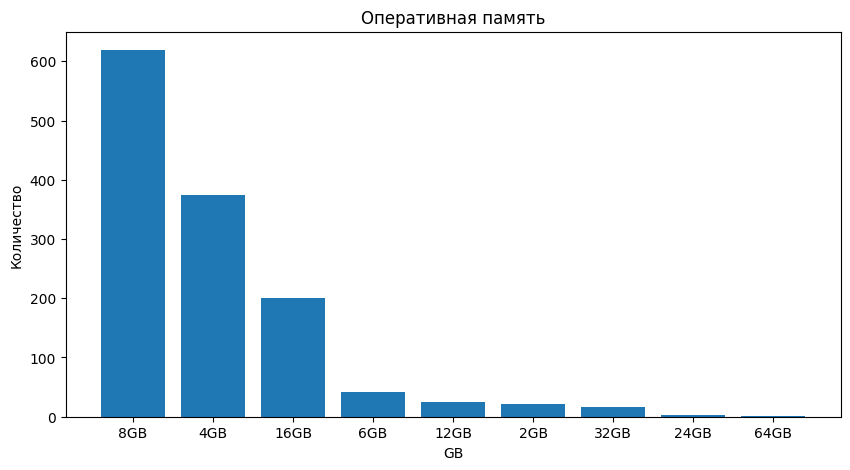

In [9]:
plt.figure(figsize = (10, 5))
plt.bar(data1['Ram'], data1['count'])
plt.title('Оперативная память')
plt.xlabel('GB')
plt.ylabel('Количество');

## 1.2
Изучите стоимость ноутбуков с помощью matplotlib.

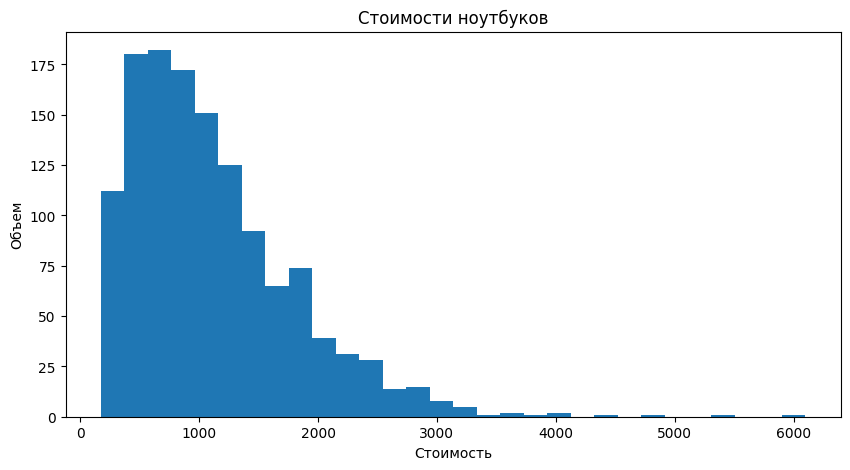

In [10]:
plt.figure(figsize = (10, 5))
plt.hist(df['Price_euros'], bins = 30)
plt.title('Стоимости ноутбуков')
plt.xlabel('Стоимость')
plt.ylabel('Объем');

In [11]:
notebooks = df[df['TypeName'] == 'Notebook'][['Company', 'TypeName', 'Price_euros']]
notebooks

,Company,TypeName,Price_euros
2,HP,Notebook,575.00
5,Acer,Notebook,400.00
10,HP,Notebook,393.90
11,HP,Notebook,344.99
13,Dell,Notebook,498.90
...,...,...,...
1295,Dell,Notebook,805.99
1297,Asus,Notebook,720.32
1300,Lenovo,Notebook,229.00
1301,HP,Notebook,764.00


In [12]:
data = notebooks.groupby('Company').agg({'Price_euros': 'sum'}).sort_values('Price_euros', ascending = False).reset_index()
data

,Company,Price_euros
0,HP,150259.31
1,Dell,143708.93
2,Lenovo,140468.62
3,Acer,42130.90
4,Asus,42015.86
5,Toshiba,39924.00
6,Xiaomi,2598.95
7,Fujitsu,2187.00
8,Mediacom,1766.00
9,Samsung,1699.00


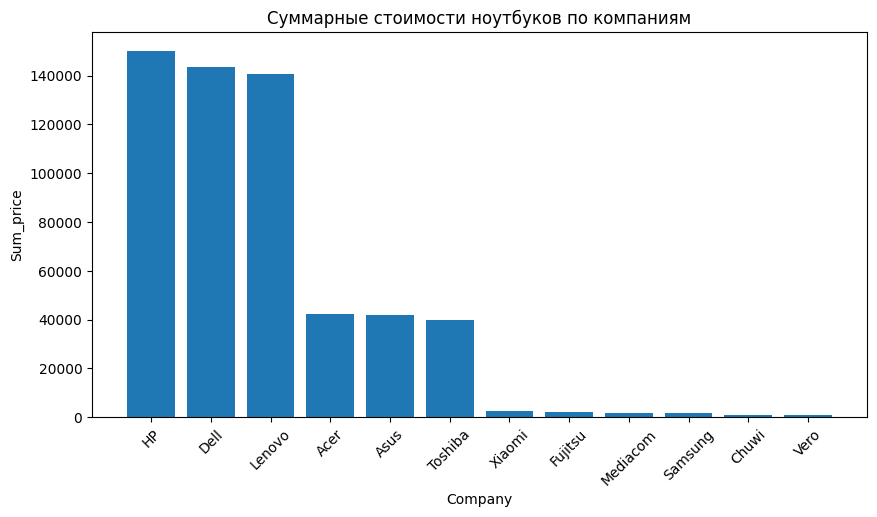

In [13]:
plt.figure(figsize = (10, 5))
plt.bar(data['Company'], data['Price_euros'])
plt.title('Суммарные стоимости ноутбуков по компаниям')
plt.xlabel('Company')
plt.ylabel('Sum_price')
plt.xticks(rotation = 45);

## 1.3
Изучите вес ноутбуков с помощью matplotlib.

In [14]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype('float')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


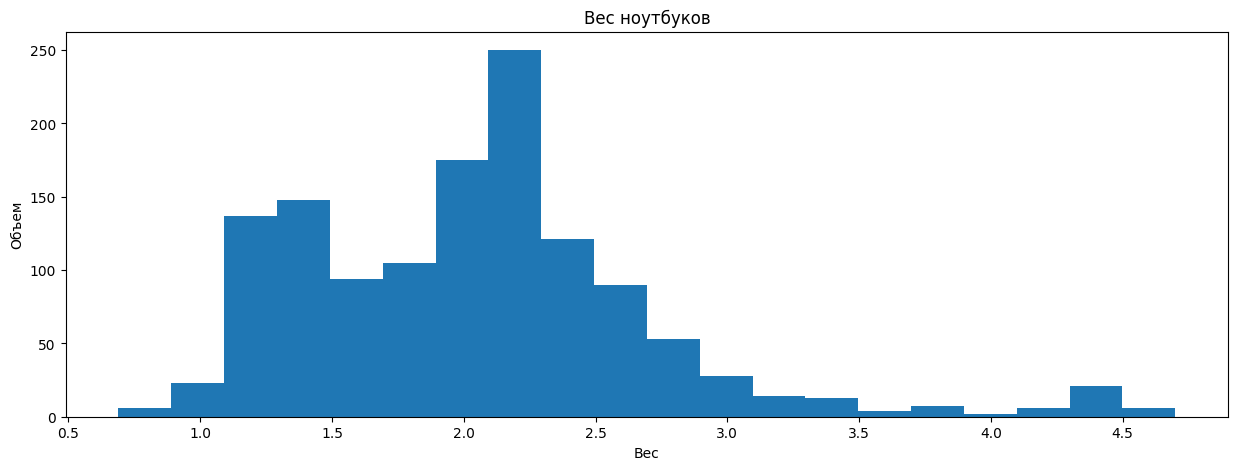

In [15]:
plt.figure(figsize = (15, 5))
plt.hist(df['Weight'], bins = 20)
plt.title('Вес ноутбуков')
plt.xlabel('Вес')
plt.ylabel('Объем');

# Задача 2

## 2.1
Изучите распределение типов носителя.

In [16]:
df['Memory_Type'] = df['Memory'].apply(lambda x: x.split(' ')[1])
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Memory_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,Flash
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,SSD
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,SSD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,SSD


In [17]:
data2 = df['Memory_Type'].value_counts()
data2

Memory_Type
SSD       843
HDD       375
Flash      75
Hybrid     10
Name: count, dtype: int64

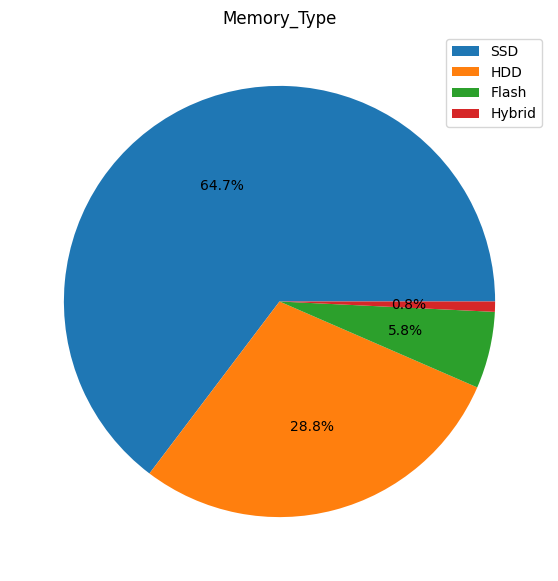

In [18]:
plt.figure(figsize = (7, 7))
plt.pie(data2, autopct = '%.1f%%')
plt.title('Memory_Type')
plt.legend(data2.index);

## 2.2
Изучите распределение компаний-производителей.

In [19]:
data3 = df['Company'].value_counts()
data3

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

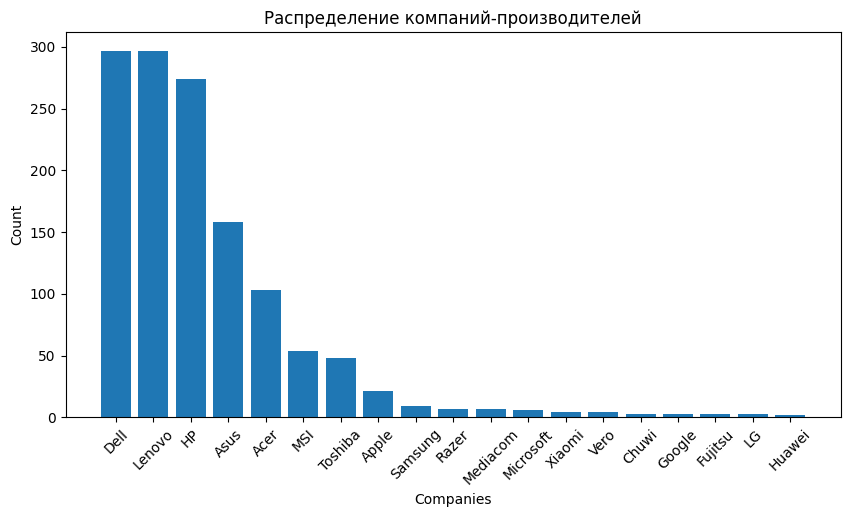

In [20]:
plt.figure(figsize = (10, 5))
plt.bar(data3.index, data3.values)
plt.title('Распределение компаний-производителей')
plt.xlabel('Companies')
plt.ylabel('Count')
plt.xticks(rotation = 45);

## 2.3
Изучите распределение операционной системы.

In [21]:
data4 = df['OpSys'].value_counts()
data4

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

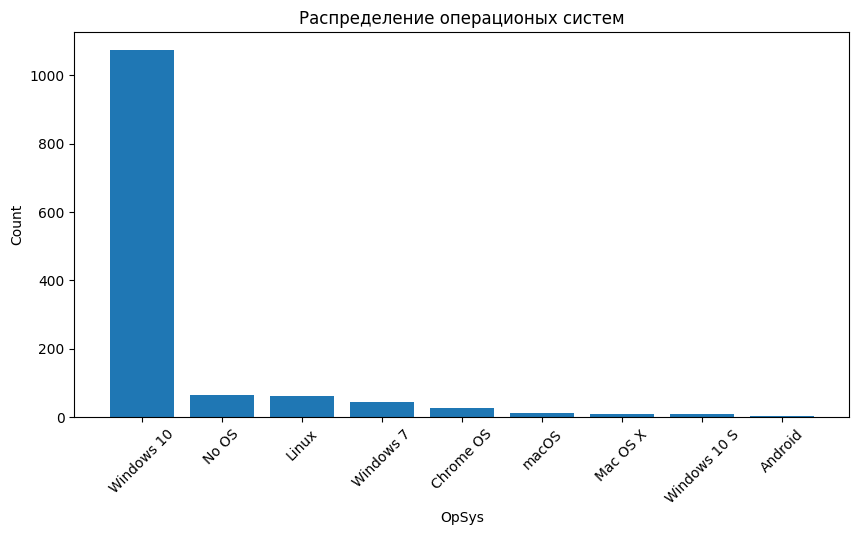

In [22]:
plt.figure(figsize = (10, 5))
plt.bar(data4.index, data4.values)
plt.title('Распределение операционых систем')
plt.xlabel('OpSys')
plt.ylabel('Count')
plt.xticks(rotation = 45);

## 2.4
Изучите распределение компаний-производителей CPU.

In [23]:
df['Cpu_Company'] = df['Cpu'].apply(lambda x: x.split(' ')[0])
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Memory_Type,Cpu_Company
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,SSD,Intel
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,Flash,Intel
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,SSD,Intel
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,SSD,Intel
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,SSD,Intel


In [24]:
data5 = df['Cpu_Company'].value_counts()
data5

Cpu_Company
Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64

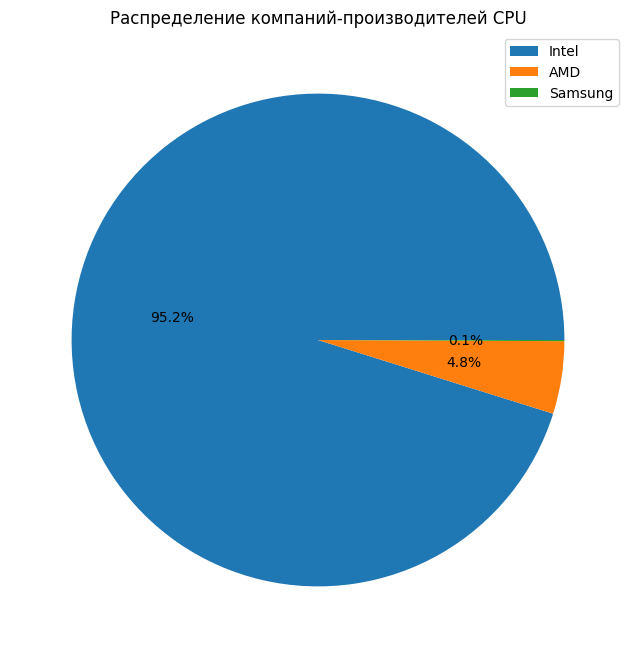

In [25]:
plt.figure(figsize = (8, 8))
plt.pie(data5, autopct = '%.1f%%')
plt.title('Распределение компаний-производителей CPU')
plt.legend(data5.index);

# Задача 3
Изучите взаимосвязь компаний-производителей ноутбуков и компаний-производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму.

Процессоры от Samsung не изучайте.

## 3.1
Постройте график в абсолютных величинах.

In [26]:
data6 = pd.crosstab(index = df['Company'], 
            columns = df['Cpu_Company'], 
            margins = True)
data6 = data6.drop(columns = 'Samsung').sort_values('All', ascending = False).reset_index()
data6

Cpu_Company,Company,AMD,Intel,All
0,All,62,1240,1303
1,Dell,0,297,297
2,Lenovo,16,281,297
3,HP,25,249,274
4,Asus,11,147,158
5,Acer,10,93,103
6,MSI,0,54,54
7,Toshiba,0,48,48
8,Apple,0,21,21
9,Samsung,0,8,9


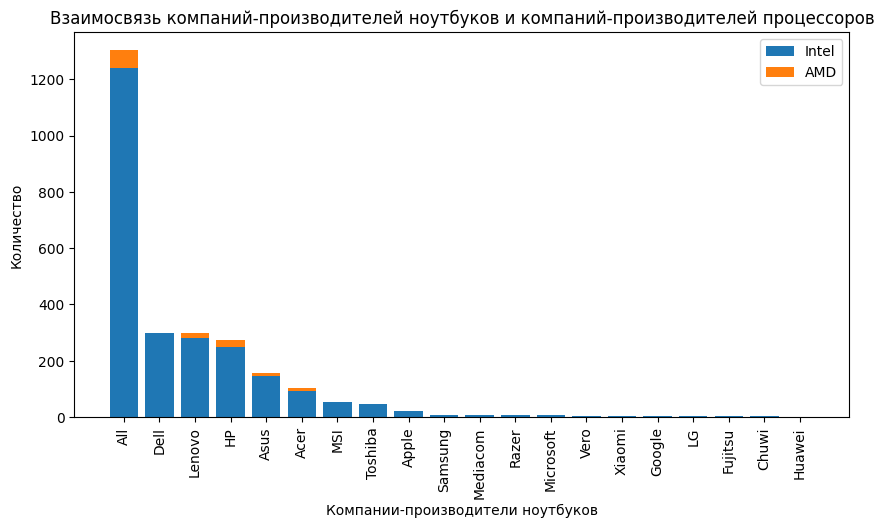

In [27]:
plt.figure(figsize = (10, 5))
plt.bar(data6['Company'], data6['Intel'])
plt.bar(data6['Company'], data6['AMD'], bottom = data6['Intel'])
plt.title('Взаимосвязь компаний-производителей ноутбуков и компаний-производителей процессоров')
plt.xlabel('Компании-производители ноутбуков')
plt.ylabel('Количество')
plt.legend(['Intel', 'AMD'])
plt.xticks(rotation = 90);

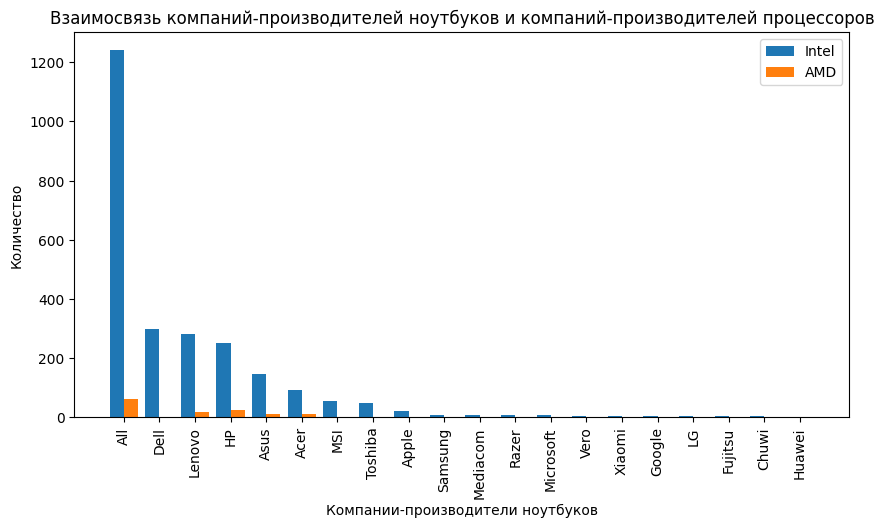

In [28]:
plt.figure(figsize = (10, 5))
n_ticks = np.arange(len(data6['Intel']))
offset = 0.2
w = 0.4
plt.bar(n_ticks - offset, data6['Intel'], width = w)
plt.bar(n_ticks + offset, data6['AMD'], width = w)
plt.title('Взаимосвязь компаний-производителей ноутбуков и компаний-производителей процессоров')
plt.xlabel('Компании-производители ноутбуков')
plt.ylabel('Количество')
plt.legend(['Intel', 'AMD'])
plt.xticks(n_ticks, data6['Company'], rotation = 90);

## 3.2
Постройте график в относительных величинах.

In [29]:
data7 = pd.crosstab(index = df['Company'], 
            columns = df['Cpu_Company'], 
            margins = True, 
            normalize = 'all')
data7 = data7.drop(columns = 'Samsung').sort_values('All', ascending = False).reset_index()
data7

Cpu_Company,Company,AMD,Intel,All
0,All,0.047583,0.951650,1.000000
1,Dell,0.000000,0.227936,0.227936
2,Lenovo,0.012279,0.215656,0.227936
3,HP,0.019186,0.191097,0.210284
4,Asus,0.008442,0.112817,0.121259
5,Acer,0.007675,0.071374,0.079048
6,MSI,0.000000,0.041443,0.041443
7,Toshiba,0.000000,0.036838,0.036838
8,Apple,0.000000,0.016117,0.016117
9,Samsung,0.000000,0.006140,0.006907


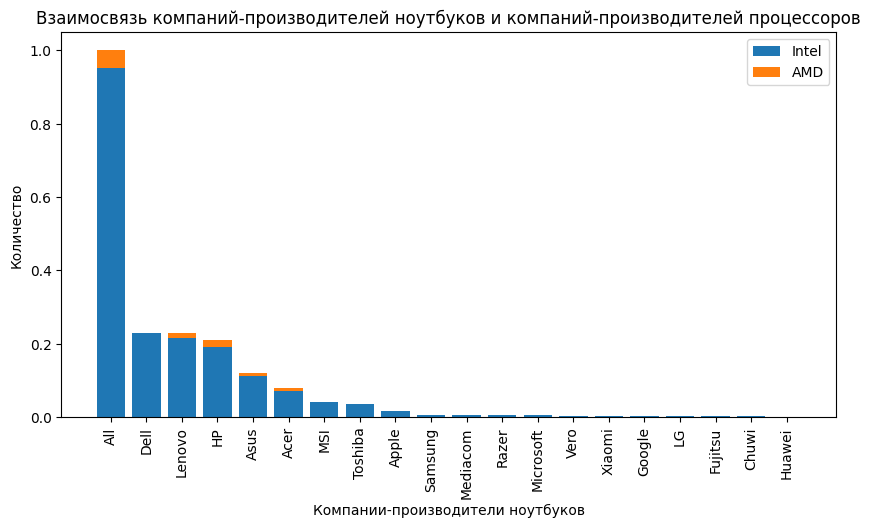

In [30]:
plt.figure(figsize = (10, 5))
plt.bar(data7['Company'], data7['Intel'])
plt.bar(data7['Company'], data7['AMD'], bottom = data7['Intel'])
plt.title('Взаимосвязь компаний-производителей ноутбуков и компаний-производителей процессоров')
plt.xlabel('Компании-производители ноутбуков')
plt.ylabel('Количество')
plt.legend(['Intel', 'AMD'])
plt.xticks(rotation = 90);

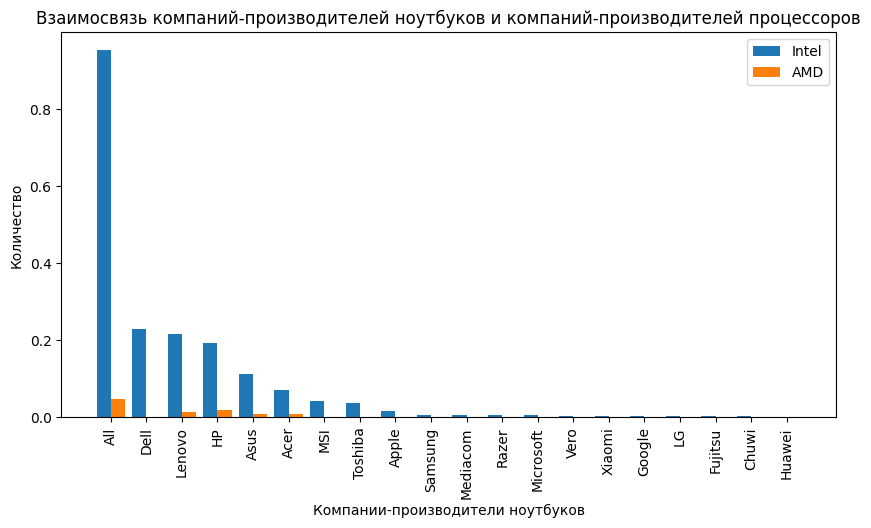

In [31]:
plt.figure(figsize = (10, 5))
n_ticks = np.arange(len(data7['Intel']))
offset = 0.2
w = 0.4
plt.bar(n_ticks - offset, data7['Intel'], width = w)
plt.bar(n_ticks + offset, data7['AMD'], width = w)
plt.title('Взаимосвязь компаний-производителей ноутбуков и компаний-производителей процессоров')
plt.xlabel('Компании-производители ноутбуков')
plt.ylabel('Количество')
plt.legend(['Intel', 'AMD'])
plt.xticks(n_ticks, data7['Company'], rotation = 90);

# Задача 4

## 4.1
Изучите взаимосвязь стоимости ноутбука и компании-производителя процессора.

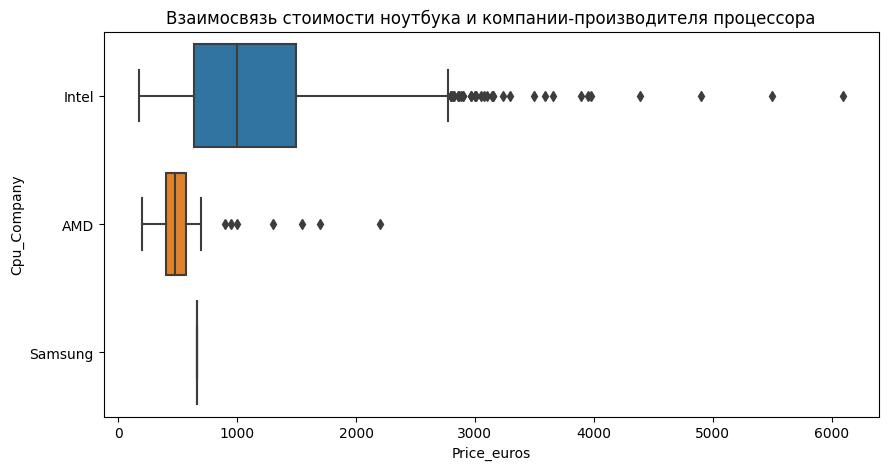

In [32]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = df['Price_euros'], y = df['Cpu_Company'], whis = 1.5)
plt.title('Взаимосвязь стоимости ноутбука и компании-производителя процессора')
plt.xlabel('Price_euros')
plt.ylabel('Cpu_Company');

## 4.3
Изучите взаимосвязь стоимости ноутбука и количества оперативной памяти.

In [33]:
df['Ram'].value_counts()

Ram
8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: count, dtype: int64

In [34]:
df['Ram_Amount'] = df['Ram'].str.replace('GB', '').astype('int64')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Memory_Type,Cpu_Company,Ram_Amount
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,SSD,Intel,8
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,Flash,Intel,8
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,SSD,Intel,8
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,SSD,Intel,16
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,SSD,Intel,8


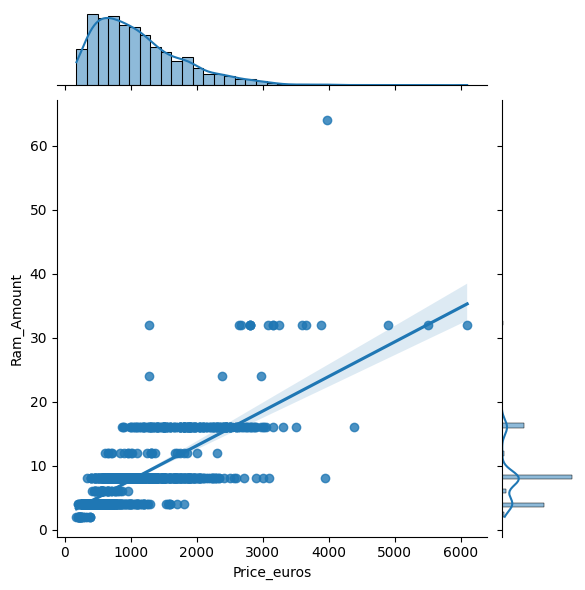

In [35]:
sns.jointplot(x = df['Price_euros'], y = df['Ram_Amount'], kind = 'reg');

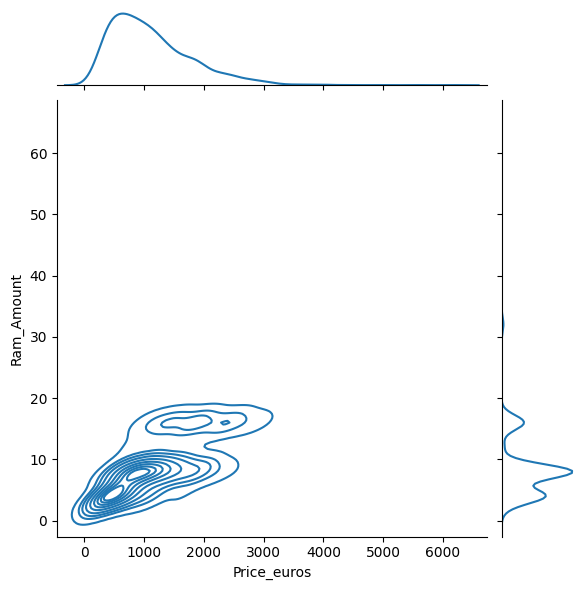

In [36]:
sns.jointplot(x = df['Price_euros'], y = df['Ram_Amount'], kind = 'kde');

# Задача 5
Постройте матрицу корреляций для таблицы.

In [37]:
data8 = df[['Inches', 'Weight', 'Price_euros', 'Ram_Amount']]
data8

,Inches,Weight,Price_euros,Ram_Amount
0,13.3,1.37,1339.69,8
1,13.3,1.34,898.94,8
2,15.6,1.86,575.00,8
3,15.4,1.83,2537.45,16
4,13.3,1.37,1803.60,8
...,...,...,...,...
1298,14.0,1.80,638.00,4
1299,13.3,1.30,1499.00,16
1300,14.0,1.50,229.00,2
1301,15.6,2.19,764.00,6


In [38]:
corr_matrix = data8.corr()
corr_matrix

,Inches,Weight,Price_euros,Ram_Amount
Inches,1.000000,0.827631,0.068197,0.237993
Weight,0.827631,1.000000,0.210370,0.383874
Price_euros,0.068197,0.210370,1.000000,0.743007
Ram_Amount,0.237993,0.383874,0.743007,1.000000


<Axes: >

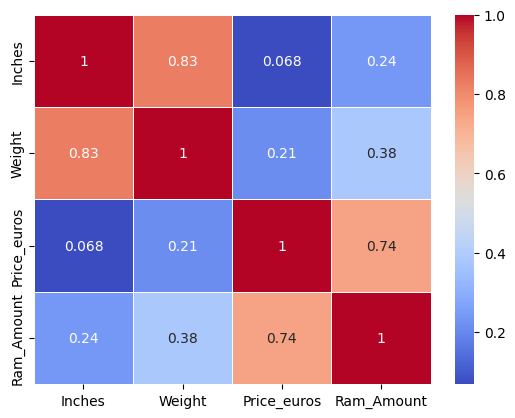

In [39]:
sns.heatmap(corr_matrix, annot = True, linewidths = .5, cmap = 'coolwarm')